### Evaluation of visual similarity between the Figma prototypes and web UIs from the generated Vue code

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
import re

In [85]:
generatedFolder = "/home/joao/figma2vuejs/evaluation/generated/"
prototypesFolder = "/home/joao/figma2vuejs/evaluation/prototype/"
animaFolder = "/home/joao/figma2vuejs/evaluation/anima/"


generatedFiles = [generatedFolder+f for f in listdir(generatedFolder) if isfile(join(generatedFolder, f))]
prototypeFiles = [prototypesFolder+f for f in listdir(prototypesFolder) if isfile(join(prototypesFolder, f))]
animaFiles = [animaFolder+f for f in listdir(animaFolder) if isfile(join(animaFolder, f))]
#generatedFiles = animaFiles   

def getFilenames(lista):
    filenames = []
    for (idx,f) in enumerate(lista):
        filenames.append(re.sub("\.png|\.jpg","",f.split("/")[len(f.split("/"))-1]))
    return filenames

#prototypenames = getFilenames(prototypeFiles)
#generatednames = getFilenames(generatedFiles)
#toremove = []
#for (idx,f) in enumerate(prototypenames):
#    if(f not in generatednames): toremove.append(prototypeFiles[idx])
#for (idx,f) in enumerate(toremove):
#    prototypeFiles.remove(f)

generatedFiles.sort()
prototypeFiles.sort()
print(generatedFiles)
print(prototypeFiles)


['/home/joao/figma2vuejs/evaluation/generated/captureA.png', '/home/joao/figma2vuejs/evaluation/generated/captureB.png', '/home/joao/figma2vuejs/evaluation/generated/captureC.png', '/home/joao/figma2vuejs/evaluation/generated/captureD.png', '/home/joao/figma2vuejs/evaluation/generated/captureE.png', '/home/joao/figma2vuejs/evaluation/generated/captureF.png', '/home/joao/figma2vuejs/evaluation/generated/captureG.png', '/home/joao/figma2vuejs/evaluation/generated/captureH.png', '/home/joao/figma2vuejs/evaluation/generated/captureI.png', '/home/joao/figma2vuejs/evaluation/generated/captureJ.png', '/home/joao/figma2vuejs/evaluation/generated/captureK.png', '/home/joao/figma2vuejs/evaluation/generated/captureL.png', '/home/joao/figma2vuejs/evaluation/generated/captureM.png', '/home/joao/figma2vuejs/evaluation/generated/captureN.png', '/home/joao/figma2vuejs/evaluation/generated/captureO.png', '/home/joao/figma2vuejs/evaluation/generated/captureP.png', '/home/joao/figma2vuejs/evaluation/gene

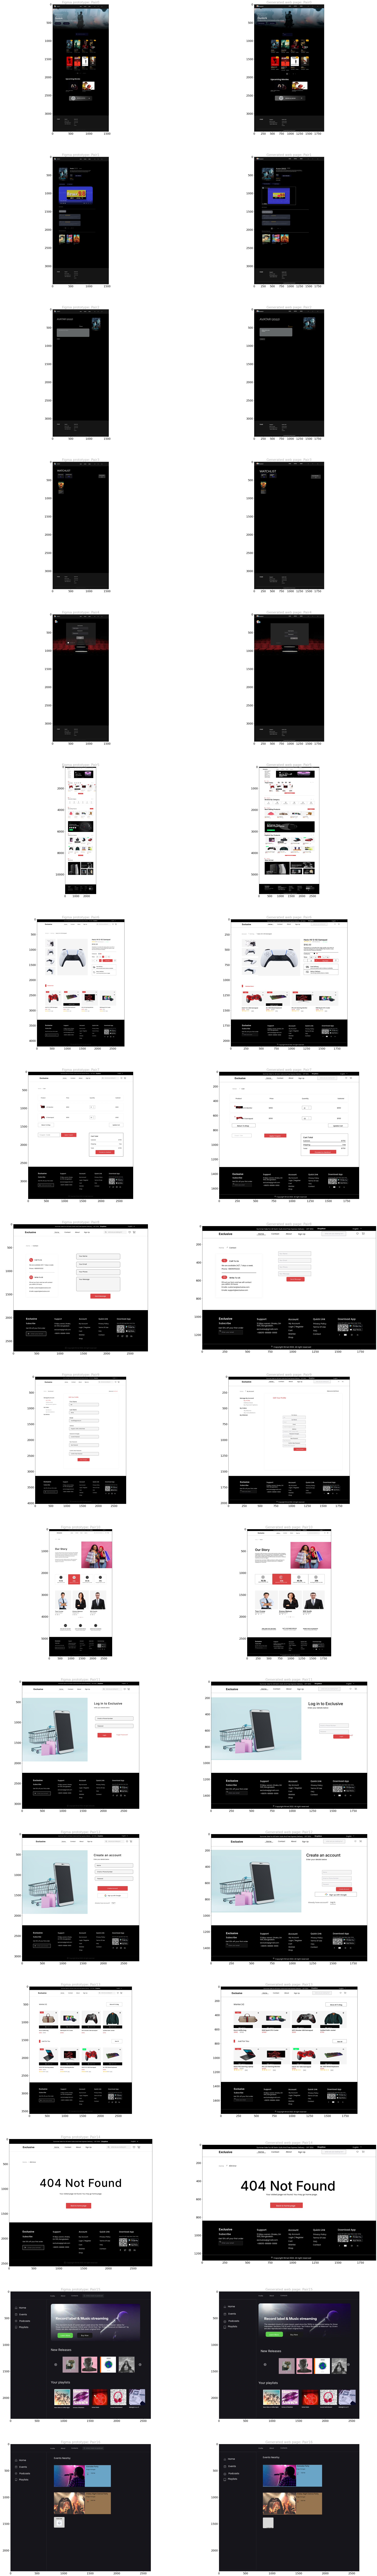

In [86]:
nr_grows = len(generatedFiles)
nr_prows = len(prototypeFiles)
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(ncols=2,nrows=nr_grows,figsize=(45, 310))

for x in range(0,nr_prows):
    img = Image.open(prototypeFiles[x])
    ax[x,0].set_title('Figma prototype: Pair'+str(x),color='0.7')
    ax[x,0].imshow(img)
    
for y in range(0,nr_grows):
    img = Image.open(generatedFiles[y])
    ax[y,1].set_title('Generated web page: Pair'+str(y),color='0.7')
    ax[y,1].imshow(img)
    
plt.show()

### Evaluting the cosine similarity and euclidian distance of embedings from a resnet50 model (CNN)

In [87]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

In [88]:
# Already pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [89]:
# Print model layers
for i, layer in enumerate(base_model.layers):
    print(f"{i}: {layer.name} — {layer.output_shape}")

0: input_3 — [(None, None, None, 3)]
1: conv1_pad — (None, None, None, 3)
2: conv1_conv — (None, None, None, 64)
3: conv1_bn — (None, None, None, 64)
4: conv1_relu — (None, None, None, 64)
5: pool1_pad — (None, None, None, 64)
6: pool1_pool — (None, None, None, 64)
7: conv2_block1_1_conv — (None, None, None, 64)
8: conv2_block1_1_bn — (None, None, None, 64)
9: conv2_block1_1_relu — (None, None, None, 64)
10: conv2_block1_2_conv — (None, None, None, 64)
11: conv2_block1_2_bn — (None, None, None, 64)
12: conv2_block1_2_relu — (None, None, None, 64)
13: conv2_block1_0_conv — (None, None, None, 256)
14: conv2_block1_3_conv — (None, None, None, 256)
15: conv2_block1_0_bn — (None, None, None, 256)
16: conv2_block1_3_bn — (None, None, None, 256)
17: conv2_block1_add — (None, None, None, 256)
18: conv2_block1_out — (None, None, None, 256)
19: conv2_block2_1_conv — (None, None, None, 64)
20: conv2_block2_1_bn — (None, None, None, 64)
21: conv2_block2_1_relu — (None, None, None, 64)
22: conv2_bl

In [90]:
#Preprocessing function to convert the image sets into batches
def getimagesBatch(paths):
    imgs = []
    for path in paths:
        img = image.load_img(path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        imgs.append(img_array)
    imgs = np.array(imgs)
    return preprocess_input(imgs)

In [91]:
#Extract embeddings in batches
def get_embeddings(paths):
    batch = getimagesBatch(paths) # extract batch
    embeddings = base_model(batch)
    normalizedembd = tf.nn.l2_normalize(embeddings, axis=1) # l2 normalization
    return normalizedembd.numpy()

In [92]:
#Compute cosine similarity
def batch_cosine_similarity(embeddings1, embeddings2):
    similarities = np.sum(embeddings1 * embeddings2, axis=1)  # dot product on axis=1 for applying for each row (each image)
    return similarities

In [93]:
# Get embeddings for both sets
proto_embeddings = get_embeddings(prototypeFiles)
webui_embeddings = get_embeddings(generatedFiles)

In [94]:
# shape: (batch_size, embedding_dim)
print(proto_embeddings.shape) # 17 : number of images, 2048 : image features extracted
print(webui_embeddings.shape)

(17, 2048)
(17, 2048)


In [95]:
# Compute similarity for each pair
cosine_similarity_scores = batch_cosine_similarity(proto_embeddings, webui_embeddings)

In [96]:
# range from -1 to 1 (1 being identical vectors)
for i, score in enumerate(cosine_similarity_scores):
    print(f"Pair {i} cosine similarity: {score:.2f}")

Pair 0 cosine similarity: 0.95
Pair 1 cosine similarity: 0.96
Pair 2 cosine similarity: 0.97
Pair 3 cosine similarity: 0.98
Pair 4 cosine similarity: 0.97
Pair 5 cosine similarity: 0.95
Pair 6 cosine similarity: 0.97
Pair 7 cosine similarity: 0.99
Pair 8 cosine similarity: 0.97
Pair 9 cosine similarity: 0.88
Pair 10 cosine similarity: 0.96
Pair 11 cosine similarity: 0.97
Pair 12 cosine similarity: 0.97
Pair 13 cosine similarity: 0.95
Pair 14 cosine similarity: 0.97
Pair 15 cosine similarity: 0.97
Pair 16 cosine similarity: 0.96


In [97]:
print(f"average cosine similarity: {sum(cosine_similarity_scores)/len(cosine_similarity_scores)}")

average cosine similarity: 0.9611823348438039


In [98]:
#Euclidean distance is l2 norm, and the default value of the ord parameter in numpy.linalg.norm is 2
# https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
euclidean_distances = np.linalg.norm(proto_embeddings - webui_embeddings, axis=1)

In [99]:
# range from 0 to 2 (0 being identical vectors)
for i, distance in enumerate(euclidean_distances):
    print(f"Pair {i} eucliadean distance: {distance:.2f}")

Pair 0 eucliadean distance: 0.30
Pair 1 eucliadean distance: 0.27
Pair 2 eucliadean distance: 0.25
Pair 3 eucliadean distance: 0.20
Pair 4 eucliadean distance: 0.24
Pair 5 eucliadean distance: 0.31
Pair 6 eucliadean distance: 0.24
Pair 7 eucliadean distance: 0.17
Pair 8 eucliadean distance: 0.26
Pair 9 eucliadean distance: 0.49
Pair 10 eucliadean distance: 0.30
Pair 11 eucliadean distance: 0.25
Pair 12 eucliadean distance: 0.24
Pair 13 eucliadean distance: 0.31
Pair 14 eucliadean distance: 0.24
Pair 15 eucliadean distance: 0.25
Pair 16 eucliadean distance: 0.29


In [100]:
print(f"average eucliadean distance {sum(euclidean_distances)/len(euclidean_distances)}")

average eucliadean distance 0.27059225913356333


In [101]:
# Some intermediate layers
layer_names = [
    'conv1_relu', 
    'conv2_block3_out',   
    'conv3_block4_out'
]
from tensorflow.keras.models import Model
# Model that outputs the intermediate layers
intermediate_layer_model = Model(
    inputs=base_model.input,
    outputs=[base_model.get_layer(name).output for name in layer_names]
)

In [102]:
# Get output feature maps of the intermediate convolutional layers
def get_intermediate_features(paths):
    x = getimagesBatch(paths)
    return intermediate_layer_model.predict(x)

In [103]:
def show_layer_differences_batch(batch,proto_feats, webui_feats, layer_names):
    layers = len(layer_names)
    plt.rcParams.update({'font.size': 11})
    for i in range(0,layers):

        diff = np.abs(proto_feats[i][batch] - webui_feats[i][batch])
        heatmap = np.sum(diff,axis=-1)

        plt.figure(figsize=(5, 4))
        plt.imshow(heatmap, cmap='hot')
        plt.title(f'Layer {layer_names[i]} – Pair {batch}',color='0.7')
        plt.axis('off')
        plt.show()

In [104]:
proto_features = get_intermediate_features(prototypeFiles)
webui_features = get_intermediate_features(generatedFiles)

1/1 [==============================] - 3s 3s/step


In [105]:
print(len(proto_features)) # 3 channels
print(proto_features[0].shape[0]) # batch size in conv1_relu layer
print(proto_features[1].shape[0]) # batch size in conv2_block3_out layer
print(proto_features[2].shape[0]) # batch size in conv3_block4_out layer
print(proto_features[0].shape) # batch size , height, width , channels
print(proto_features[1].shape) 
print(proto_features[2].shape)

3
17
17
17
(17, 112, 112, 64)
(17, 56, 56, 256)
(17, 28, 28, 512)


### Heatmap showing the major differences between the most deviated generated UIs and their prototypes

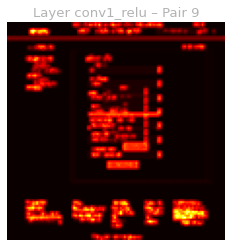

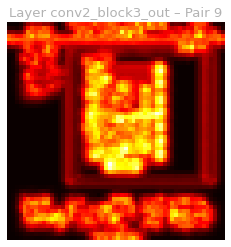

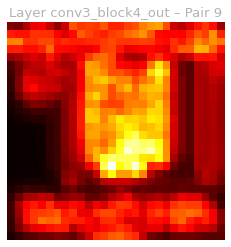

In [106]:
# the most deviated
n_batch = sorted(enumerate(cosine_similarity_scores),key=lambda x: x[1])[0][0]

show_layer_differences_batch(n_batch,proto_features, webui_features, layer_names)


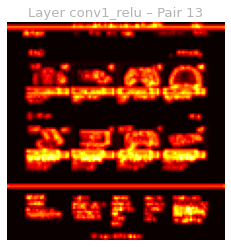

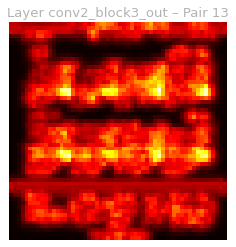

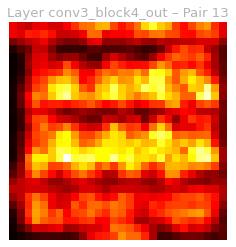

In [107]:
# 2nd most deviated
n_batch = sorted(enumerate(cosine_similarity_scores),key=lambda x: x[1])[1][0]

show_layer_differences_batch(n_batch,proto_features, webui_features, layer_names)


### Calculate structural similarity index measure (SSIM) between the pairs

In [108]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np
from PIL import Image 

In [109]:
def image2GrayScale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [110]:
scores = []
def getSimilarity(pair,proto,webui):
    image_proto = cv2.imread(proto)
    image_webui = cv2.imread(webui)

    resized_proto = cv2.resize(image_proto, (720, 1280))
    resized_webui = cv2.resize(image_webui, (720, 1280))
    proto_gray = image2GrayScale(resized_proto)
    webui_gray = image2GrayScale(resized_webui)
    # Compute SSIM between two images
    (score, diff) = structural_similarity(proto_gray, webui_gray, full=True)
    scores.append((pair,score))
    print(f"Image similarity for pair {str(pair)}: {str(round(score,2))}")
    return score, diff

In [111]:
def getdiff_regions(diff):
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    return contours

In [112]:
import os
path = '/home/joao/figma2vuejs/evaluation/diff'

def safe_imwrite(name, img):
    if img.dtype != np.uint8:
        img = (img * 255).astype("uint8")
    success = cv2.imwrite(name, img)
    if not success:
        print("Failed to save:", name)

In [113]:
def show_regions(contours,diff,img1,img2):
    name1 = img1.split("/")[len(img1.split("/"))-1]
    name2 = img2.split("/")[len(img2.split("/"))-1]
    img1 = cv2.imread(img1)
    img2 = cv2.imread(img2)
    mask = np.zeros(img1.shape, dtype='uint8')
    filled_after = img2.copy()

    for c in contours:
        area = cv2.contourArea(c)
        if area > 40:
            x,y,w,h = cv2.boundingRect(c)
            cv2.rectangle(img1, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.rectangle(img2, (x, y), (x + w, y + h), (36,255,12), 2)
            cv2.drawContours(mask, [c], 0, (0,255,0), -1)
            cv2.drawContours(filled_after, [c], 0, (0,255,0), -1)

    safe_imwrite(os.path.join(path,"before-"+name2), img1)
    safe_imwrite(os.path.join(path,"after-"+name2), img2)
    safe_imwrite(os.path.join(path,"diff-"+name2), diff)
    safe_imwrite(os.path.join(path,"mask-"+name2), mask)
    safe_imwrite(os.path.join(path,"filled_after-"+name2), filled_after)
    cv2.waitKey(0)

In [114]:
for i in range(0,len(prototypeFiles)):
    if(i<len(generatedFiles)):
        score,diff = getSimilarity(i,prototypeFiles[i],generatedFiles[i])
        contours = getdiff_regions(diff)
        show_regions(contours,diff,prototypeFiles[i],generatedFiles[i])

Image similarity for pair 0: 0.8
Image similarity for pair 1: 0.79
Image similarity for pair 2: 0.93
Image similarity for pair 3: 0.94
Image similarity for pair 4: 0.93
Image similarity for pair 5: 0.65
Image similarity for pair 6: 0.78
Image similarity for pair 7: 0.83
Image similarity for pair 8: 0.82
Image similarity for pair 9: 0.85
Image similarity for pair 10: 0.72
Image similarity for pair 11: 0.8
Image similarity for pair 12: 0.78
Image similarity for pair 13: 0.74
Image similarity for pair 14: 0.85
Image similarity for pair 15: 0.75
Image similarity for pair 16: 0.89


In [115]:
from IPython.display import Image, display
import random
diffdir = "/home/joao/figma2vuejs/evaluation/diff/"

aftercapture_files = [diffdir+f for f in listdir(diffdir) if isfile(join(diffdir, f)) and "/after-capture" in diffdir+f]
if(len(aftercapture_files)>3):
    aftercapture_files = random.sample(aftercapture_files, 3)

#for img in aftercapture_files:
#    display(Image(filename = img, width = 600, height = 300))

In [116]:
from functools import reduce

reduced_scores =  reduce(lambda x, y: (x[0] + y[0],x[1] + y[1]), scores)
average_score = reduced_scores[1]/len(scores)
print("average SSIM: "+str(average_score))

average SSIM: 0.8139398661475276
